In [1]:
from distribution import TestDistribution

from RTER import RegressionTree

import numpy as np

from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from time import time
import os

from comparison.ensemble import RegressionTreeBoosting, RegressionTreeEnsemble
from comparison.EKNN import EKNN

import matplotlib.pyplot as plt

In [26]:


#distribution_index_vec=[1,2,3,4]





np.random.seed(2)



sample_generator=TestDistribution(1).returnDistribution()
n_test, n_train = 2000,1000
X_train, Y_train = sample_generator.generate(n_train)
X_test, Y_test = sample_generator.generate(n_test)



# RTER with cv
time_start=time()
parameters= {"truncate_ratio_low":[0], "truncate_ratio_up":[1],
           "min_samples_split":[10], "max_depth":[1,2,3,4,5],
           "order":[0,1,2,3,4,5,6],"splitter":["maxedge"],
            "estimator":["pointwise_extrapolation_estimator"],
           "r_range_low":[0],"r_range_up":[1],
           "step":[1],"lamda":[0.000001],"V":[10,15,20,25,30]}
cv_model_RTER=GridSearchCV(estimator=RegressionTree(),param_grid=parameters, cv=3, n_jobs=50)
cv_model_RTER.fit(X_train, Y_train)

RTER_model = cv_model_RTER.best_estimator_
mse_score= - RTER_model.score(X_test, Y_test)
y_hat_RTER = RTER_model.predict(X_test)

time_end=time()

print("RTER: mse {} time {}".format(mse_score,time_end-time_start))

'''
# boosting
time_start=time()
parameters={"rho":[0.01,0.05,0.1,0.2], "boost_num":[20,50,100],
            "min_samples_split":[2,5,10,20,30], 
            "max_depth":[3,4,5,6,7,8],"splitter":["maxedge"]}
cv_model_boosting=GridSearchCV(estimator=RegressionTreeBoosting(),param_grid=parameters, cv=10, n_jobs=-1)
cv_model_boosting.fit(X_train, Y_train)

boosting_model = cv_model_boosting.best_estimator_
mse_score= - boosting_model.score(X_test, Y_test)

time_end=time()

print("boosting: mse {} time {}".format(mse_score,time_end-time_start))


# ensemble
time_start=time()
parameters={ "ensemble_num":[20,50,100,200,500,1000,2000],
            "min_samples_split":[2,5,10,20,30], 
            "max_depth":[3,4,5,6,7,8],"splitter":["maxedge"]}
cv_model_ensemble=GridSearchCV(estimator=RegressionTreeEnsemble(),param_grid=parameters, cv=10, n_jobs=-1)
cv_model_ensemble.fit(X_train, Y_train)

ensemble_model = cv_model_ensemble.best_estimator_
mse_score= - ensemble_model.score(X_test, Y_test)

time_end=time()

print("ensemble: mse {} time {}".format(mse_score,time_end-time_start))
'''


# GBRT
time_start=time()

parameters= {"n_estimators":[500,1000,2000], "learning_rate":[0.01,0.05]}
cv_model_GBRT=GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=parameters, cv=10, n_jobs=-1)
cv_model_GBRT.fit(X_train, Y_train)
model_GBRT = cv_model_GBRT.best_estimator_
model_GBRT.fit(X_train, Y_train.ravel())

y_hat=model_GBRT.predict(X_test)
mse_score = MSE(y_hat, Y_test)

time_end=time()

print("GBRT: mse {} time {}".format(mse_score,time_end-time_start))

'''
# RF
time_start=time()

parameters = {"n_estimators":[10,100,200]}
cv_model_RFR = GridSearchCV(estimator=RandomForestRegressor(),param_grid=parameters, cv=10, n_jobs=-1) 
cv_model_RFR.fit(X_train, Y_train)
model_RFR = cv_model_RFR.best_estimator_
model_RFR.fit(X_train, Y_train)

y_hat=model_RFR.predict(X_test)
mse_score = MSE(y_hat, Y_test)

time_end=time()

print("RF: mse {} time {}".format(mse_score,time_end-time_start))

# EKNN
time_start=time()

parameters = {"V":[3,5,7,9,11,13,15,17,19], "C":[5,7,9,10,11,13,15],"alpha":[0.01,0.05]}
cv_model_EKNN = GridSearchCV(estimator=EKNN(),param_grid=parameters, cv=10, n_jobs=-1) 
cv_model_EKNN.fit(X_train, Y_train)
model_EKNN = cv_model_EKNN.best_estimator_
model_EKNN.fit(X_train, Y_train)

y_hat=model_EKNN.predict(X_test)
mse_score = MSE(y_hat, Y_test)

time_end=time()

print("EKNN: mse {} time {}".format(mse_score,time_end-time_start))
'''

RTER: mse 0.9797678608058283 time 8.128718852996826
GBRT: mse 1.0103503276441732 time 2.6345722675323486


'\n# RF\ntime_start=time()\n\nparameters = {"n_estimators":[10,100,200]}\ncv_model_RFR = GridSearchCV(estimator=RandomForestRegressor(),param_grid=parameters, cv=10, n_jobs=-1) \ncv_model_RFR.fit(X_train, Y_train)\nmodel_RFR = cv_model_RFR.best_estimator_\nmodel_RFR.fit(X_train, Y_train)\n\ny_hat=model_RFR.predict(X_test)\nmse_score = MSE(y_hat, Y_test)\n\ntime_end=time()\n\nprint("RF: mse {} time {}".format(mse_score,time_end-time_start))\n\n# EKNN\ntime_start=time()\n\nparameters = {"V":[3,5,7,9,11,13,15,17,19], "C":[5,7,9,10,11,13,15],"alpha":[0.01,0.05]}\ncv_model_EKNN = GridSearchCV(estimator=EKNN(),param_grid=parameters, cv=10, n_jobs=-1) \ncv_model_EKNN.fit(X_train, Y_train)\nmodel_EKNN = cv_model_EKNN.best_estimator_\nmodel_EKNN.fit(X_train, Y_train)\n\ny_hat=model_EKNN.predict(X_test)\nmse_score = MSE(y_hat, Y_test)\n\ntime_end=time()\n\nprint("EKNN: mse {} time {}".format(mse_score,time_end-time_start))\n'

In [13]:
score_vec = np.sort(cv_model_RTER.cv_results_["mean_test_score"])[-5:]
score_vec

array([-0.12164682, -0.12116947, -0.12097095, -0.12076416, -0.12076333])

In [14]:
idx_best_results = [cv_model_RTER.cv_results_["mean_test_score"][i] in score_vec for i in range(len(cv_model_RTER.cv_results_["mean_test_score"]))]

In [15]:
idx_best_results = np.array(idx_best_results)

In [16]:
idx_best_results = np.where(idx_best_results)[0]

In [17]:
idx_best_results

array([  0,  35,  70, 105, 140])

In [18]:
[cv_model_RTER.cv_results_["params"][i] for i in idx_best_results]

[{'V': 10,
  'estimator': 'pointwise_extrapolation_estimator',
  'lamda': 0.1,
  'max_depth': 1,
  'min_samples_split': 10,
  'order': 0,
  'r_range_low': 0,
  'r_range_up': 1,
  'splitter': 'maxedge',
  'step': 1,
  'truncate_ratio_low': 0,
  'truncate_ratio_up': 1},
 {'V': 15,
  'estimator': 'pointwise_extrapolation_estimator',
  'lamda': 0.1,
  'max_depth': 1,
  'min_samples_split': 10,
  'order': 0,
  'r_range_low': 0,
  'r_range_up': 1,
  'splitter': 'maxedge',
  'step': 1,
  'truncate_ratio_low': 0,
  'truncate_ratio_up': 1},
 {'V': 20,
  'estimator': 'pointwise_extrapolation_estimator',
  'lamda': 0.1,
  'max_depth': 1,
  'min_samples_split': 10,
  'order': 0,
  'r_range_low': 0,
  'r_range_up': 1,
  'splitter': 'maxedge',
  'step': 1,
  'truncate_ratio_low': 0,
  'truncate_ratio_up': 1},
 {'V': 25,
  'estimator': 'pointwise_extrapolation_estimator',
  'lamda': 0.1,
  'max_depth': 1,
  'min_samples_split': 10,
  'order': 0,
  'r_range_low': 0,
  'r_range_up': 1,
  'splitter': 'm

In [27]:
cv_model_RTER.best_params_

{'V': 20,
 'estimator': 'pointwise_extrapolation_estimator',
 'lamda': 1e-06,
 'max_depth': 4,
 'min_samples_split': 10,
 'order': 0,
 'r_range_low': 0,
 'r_range_up': 1,
 'splitter': 'maxedge',
 'step': 1,
 'truncate_ratio_low': 0,
 'truncate_ratio_up': 1}

In [20]:
def plot_polynomial(beta,r, radius):
    result = 0
    for idx_b, b in enumerate(beta.ravel()):
        result += (r*radius)**idx_b * b
    return result



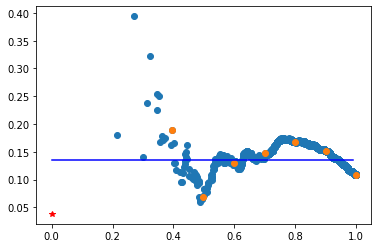

In [21]:
testpoint = X_test[0] 
pred_weights, all_r , all_y_hat  , used_r, used_y_hat = RTER_model.get_info(testpoint.reshape(1,-1))
_=plt.scatter(all_r,all_y_hat,label = "Samples in the Cell")
_=plt.scatter(used_r, used_y_hat, label = "Samples for Regression")


r_arange = np.arange(0,1,0.01)
y_hat_regressed = np.array([plot_polynomial(pred_weights, r,1) for r in r_arange])

_= plt.plot(r_arange, y_hat_regressed,color = "blue",label = "Regression Curve")

plt.plot(0,sample_generator.evaluate(testpoint.reshape(1,-1)).item(), marker = "*",color = "red" )
#plt.plot(0,pred_weights[0,0], marker = '*', color ="blue")



In [35]:
idx_test=((y_hat_RTER - sample_generator.evaluate(X_test))**2).argmax()
#((y_hat_RTER - sample_generator.evaluate(X_test))**2).max()
idx_test

612

In [37]:
idx_test = 612
pred_y, all_r , all_y_hat  , used_r, used_y_hat = RTER_model.get_info(X_test[idx_test].reshape(1,-1))

1


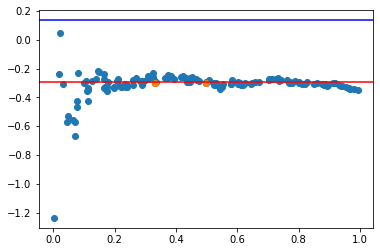

In [38]:
_=plt.scatter(all_r,all_y_hat)
_=plt.scatter(used_r, used_y_hat)
_=plt.axhline(pred_y,color="red")
_=plt.axhline(sample_generator.evaluate(X_test[idx_test].reshape(1,-1)).item(),color="blue")

In [4]:

np.random.seed(3)



sample_generator=TestDistribution(1).returnDistribution()
n_test, n_train = 4000,2000
X_train, Y_train = sample_generator.generate(n_train)
X_test, Y_test = sample_generator.generate(n_test)



In [5]:
model = RegressionTree(estimator="pointwise_extrapolation_estimator",
                         splitter="maxedge",
                         min_samples_split=3,
                         max_depth=1,
                         order=6,
                         random_state=4,
                         lamda = 0.01,
                          V=25,
                      r_range_low = 0,
                      r_range_up = 0.4)
model.fit(X_train, Y_train)

model.score(X_test,Y_test)


-1.014294271928766

In [201]:
#model.predict(X_test).ravel()[idx]

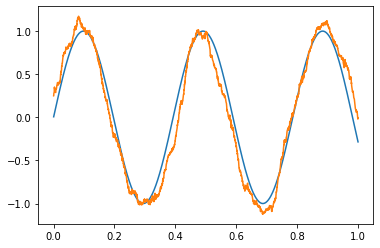

In [6]:
idx = np.argsort(X_test.ravel())
plt.plot(X_test.ravel()[idx],sample_generator.evaluate(X_test).ravel()[idx])
plt.plot(X_test.ravel()[idx],model.predict(X_test).ravel()[idx])

In [183]:
pred_y, all_r , all_y_hat  , used_r, used_y_hat = model.get_info(X_test[2].reshape(1,-1))

1


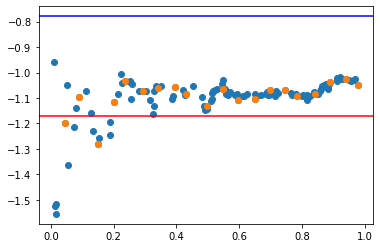

In [108]:
_=plt.scatter(all_r,all_y_hat)
_=plt.scatter(used_r, used_y_hat)
_=plt.axhline(pred_y,color="red")
_=plt.axhline(sample_generator.evaluate(X_test[2].reshape(1,-1)).item(),color="blue")

In [44]:
model.score(X_test, Y_test)

-1.006611563540693

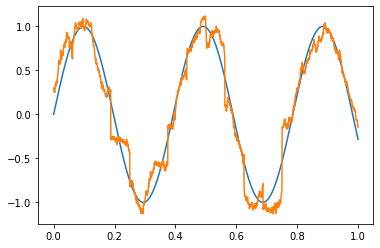

In [45]:
idx = np.argsort(X_test.ravel())
plt.plot(X_test.ravel()[idx],sample_generator.evaluate(X_test).ravel()[idx])
plt.plot(X_test.ravel()[idx],model.predict(X_test).ravel()[idx])

In [12]:
X_test.ravel().shape,sample_generator.evaluate(X_test).ravel().shape

((8000,), (4000,))

In [23]:
np.argsort(X_test.ravel())

array([3301, 3519, 2997, ...,  354, 1166, 3023])